In [48]:
import numpy as np
import pylab as pl
from sympy.ntheory.elliptic_curve import EllipticCurve
from gmpy2 import is_prime

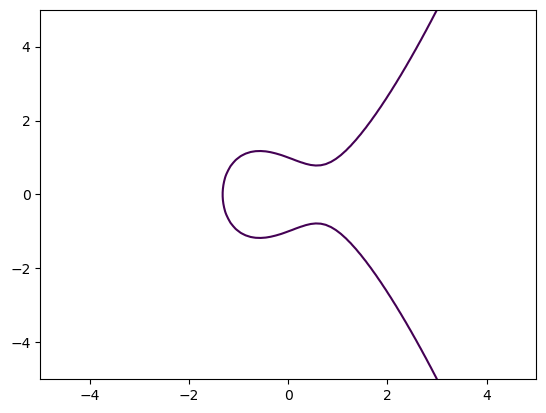

In [11]:
Y, X = np.mgrid[-5:5:100j, -5:5:100j]

def f(x, a, b):
    return x**3 +a*x + b

pl.contour(X, Y, Y**2 - f(X,-1,1), levels=[0])


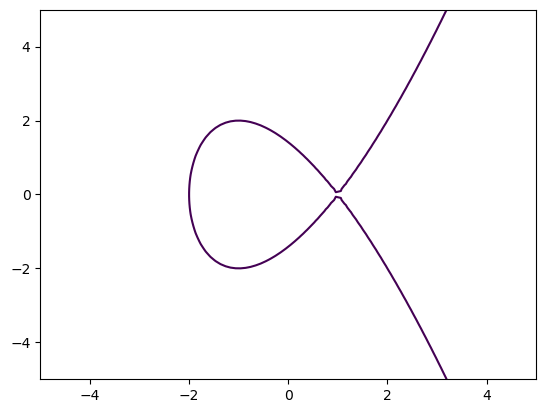

In [12]:
Y, X = np.mgrid[-5:5:100j, -5:5:100j]

def f(x, a, b):
    return x**3 +a*x + b

pl.contour(X, Y, Y**2 - f(X,-3,2), levels=[0])


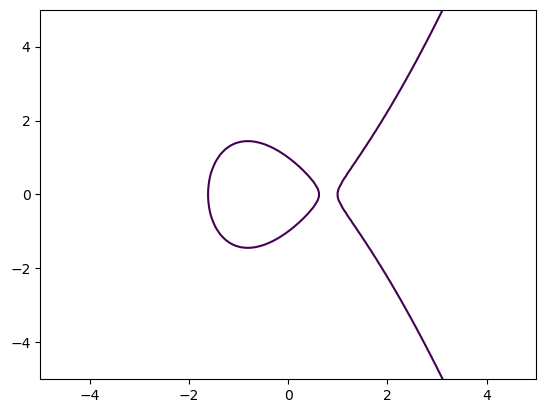

In [13]:
Y, X = np.mgrid[-5:5:100j, -5:5:100j]

def f(x, a, b):
    return x**3 +a*x + b

pl.contour(X, Y, Y**2 - f(X,-2,1), levels=[0])


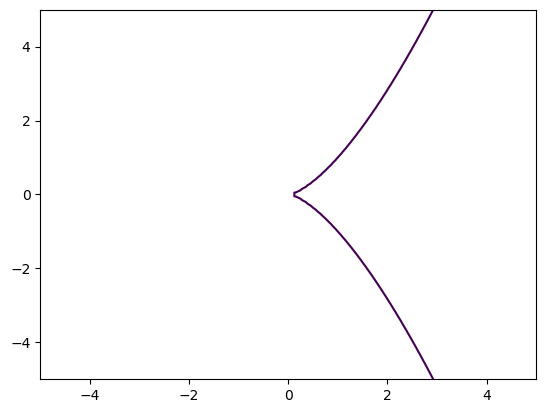

In [14]:
Y, X = np.mgrid[-5:5:100j, -5:5:100j]

def f(x, a, b):
    return x**3 +a*x + b

pl.contour(X, Y, Y**2 - f(X,0,0), levels=[0])


In [15]:
# Задание 2
# найти ошибку в модуле sympy

In [16]:
# Задание 3
class Curve:
    def __init__(self, a, b, p):
        from sympy.ntheory import isprime
        if not isprime(p):
            raise ValueError("p should be prime")
        self.a = a
        self.b = b
        self.p = p

    def __repr__(self):
        return 'y**2 = x**3 + %dx + %d   mod %d' % (self.a, self.b, self.p) 
    
    def __eq__(self, other):
        return (self.a % self.p,self.b % self.p, self.p) == (other.a % other.p,other.b%other.p,other.p)


    
curve = Curve(-2, 1, 11)    
curve

y**2 = x**3 + -2x + 1   mod 11

In [18]:
class Point:
    def __init__(self, x, y, curve:Curve):
        if x == y == None:
            self.x = x
            self.y = y
        else:
            if not (x**3+curve.a*x+curve.b-y*y) % curve.p == 0:
                raise ValueError("(%d, %d) should be y**2 == x**3 +ax + b mod p"%(x,y))
            self.x = x % curve.p
            self.y = y % curve.p
        self.curve = curve
        
    def __repr__(self):
        if self.x == self.y == None:
            return 'Elliptic Point = Infinity Point'
        return 'Elliptic Point = (%d,%d)' % (self.x,self.y) 
    
    def __eq__(self, other):
        return (self.x,self.y) == (other.x,other.y)
P = Point(0, 1, curve) 
O = Point(None, None, curve)
P

Elliptic Point = (0,1)

In [19]:
def GenPoint(self, x, y):
    return Point(x, y, self)

Curve.__call__= GenPoint
Q = curve(2,7)
Q

Elliptic Point = (2,7)

In [20]:
def BruteForce(self):
    points = [Point(None,None,self)]
    for x in range(self.p):
        for y in range(self.p):
            if (x**3 + self.a * x + self.b - y**2) % self.p == 0:
                points.append(Point(x,y,self))
    return points
Curve.pointsBF = BruteForce
curve.pointsBF()

[Elliptic Point = Infinity Point,
 Elliptic Point = (0,1),
 Elliptic Point = (0,10),
 Elliptic Point = (1,0),
 Elliptic Point = (2,4),
 Elliptic Point = (2,7),
 Elliptic Point = (3,0),
 Elliptic Point = (7,0)]

In [32]:
def st(n):
    s = 0
    t = n
    while t % 2 == 0:
        s += 1
        t = t // 2
    return s, t
def Jacobi(a,n):
    if n < 0 or not n % 2:
        raise ValueError("n should be an odd positive integer") 
    j = 1
    if n == 1:
        return j
    if a<0:
        a = -a
        if n%4 == 3:
            j = -j
    while n>1:
        if a == 0:
            return 0
        s,t = st(a)
        if (s%2 == 1) & (n%8 in [3, 5]):
            j = -j
        if 3 == n%4 == t%4:
            j = -j
        a = n%t
        n = t
    return j
def Shanks(a, p):
    if not Jacobi(a, p) == 1:
        raise ValueError("a should be a quadratic residue")
    s,t = st(p-1)
    import random
    n = random.randint(2,p-2)
    while Jacobi(n,p) == 1:
        n = random.randint(2,p-2)
    b = pow(n,t,p)
    r = pow(a,(t+1)//2,p)
    d = 0
    f = pow(a,t,p)
    b2 = b
    for i in range(1,s):
        b2 = b2*b2 % p
        if not pow(f,2**(s-1-i),p) == 1:
            d += 2**i
            f = f*b2 % p 
    return r*pow(b,d//2,p) % p

def TonelliShanks(self):
    points = [Point(None,None,self)]
    for x in range(self.p):
        RightPart = (x**3 + self.a * x + self.b) % self.p
        if Jacobi(RightPart,self.p) == 1:
            y = Shanks(RightPart, self.p)
            points.append(Point(x,y,self))
            points.append(Point(x,self.p-y,self))
        if  RightPart == 0:  
            points.append(Point(x,0,self))
    return points
Curve.pointsTS = TonelliShanks

#простое решение
def points_x(self,x):
    return [i for i in curve.pointsTS() if i.x==x]
Curve.points_x = points_x

print(curve.points_x(1))

[Elliptic Point = (1,0)]


In [25]:
help(EllipticCurve.points_x)

Help on function points_x in module sympy.ntheory.elliptic_curve:

points_x(self, x)
    Returns points on with curve where xcoordinate = x



In [35]:
##########################################################
def randpoint(self):
    from random import randrange
    while 1:
        x = randrange(self.p)
        RightPart = (x**3 + self.a * x + self.b) % self.p
        if Jacobi(RightPart, self.p) == 1:
            return Point(x, Shanks(RightPart, self.p),self)
Curve.randpoint = randpoint

P = curve.randpoint()
P

Elliptic Point = (13,5)

In [40]:
def Scalar_multiplication(self, m: int) -> Point:
    result = O
    Q = self
    while m:
        if m & 1:
            result += Q
        Q += Q
        m >>= 1
    return result

Point.__rmul__ = Scalar_multiplication

3*P == P + P + P 

True

In [41]:
#4 задание
def negative_point(self):
    self.y=-self.y
    return self
Curve.__neg__= negative_point

def point_addition(self, other: Point) -> Point:
    if self == O:
        return other
    if other == O:
        return self
    if self.x == other.x and self.y != other.y:
        return O
    if self.x == other.x and self.y == other.y == 0:
        return O
    if self.x == other.x: 
        k = (3 * self.x**2 + self.curve.a) * pow(2 * self.y,-1, self.curve.p) % self.curve.p
    else:
        k = (self.y - other.y) * pow(self.x - other.x, -1, self.curve.p) % self.curve.p
    rx = (k**2 - self.x - other.x) % self.curve.p
    ry = (-(k*(rx - self.x) + self.y)) % self.curve.p
    return Point(rx, ry, self.curve)

Point.__add__ = point_addition
P+P

Elliptic Point = (17,3)

In [42]:
def curve_order(self):
    return len(self.pointsTS())
Curve.order = curve_order

curve = Curve(1,0,19)
n = curve.order()
print('Порядок кривой = ', n)
P = curve.randpoint()
print(P)
print(n*P)

Порядок кривой =  20
Elliptic Point = (3,7)
Elliptic Point = Infinity Point


In [47]:
#задание 5
def TSNormView(self):
    return [[p.x,p.y] for p in self.pointsTS()]
Curve.pointsTSnorm = TSNormView



In [66]:
# найдем кривую простого порядка
def prime_curve():
    for i in range(2,10):
        for j in range(2,10):
            for k in range(2,10):
                if is_prime(k): 
                    try:
                        curve = Curve(i,j,k)
                        if is_prime(curve.order()):
#                             print(len(curve.pointsTSnorm()))
                            return curve
                    except:
                        continue
        


In [71]:
pr_cur = prime_curve()
print(pr_cur)
print(pr_cur.order())

print(curve.pointsTSnorm())
# для того чтобы она была циклической нужно
# чтобы она была изоморфна n*Zn
# для изоморфности не хватает 1 и вообще не понятно что
# делать с бесконечно удаленной

y**2 = x**3 + 2x + 2   mod 5
7
[[None, None], [0, 4], [0, 3], [2, 0], [3, 0], [4, 2], [4, 5], [5, 2], [5, 5]]
